Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


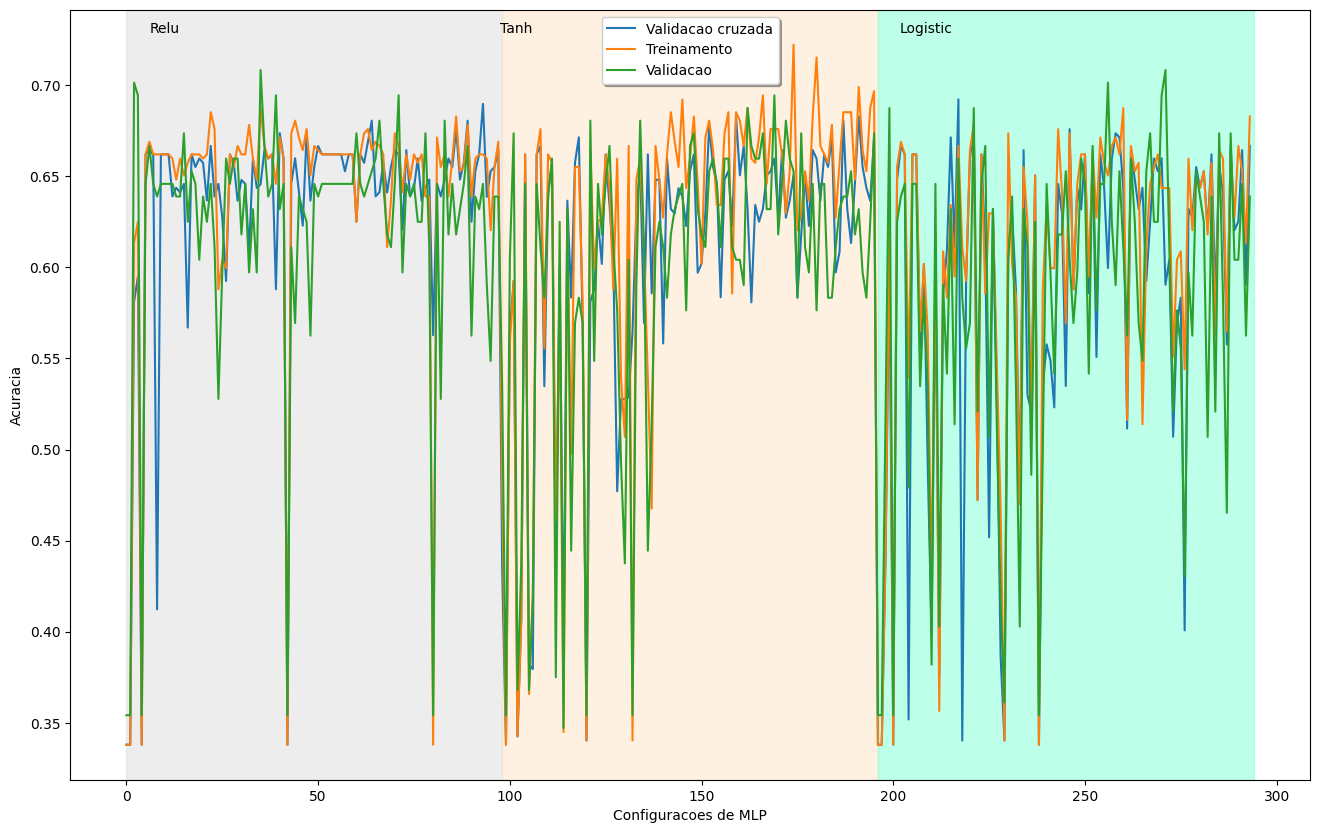

In [ ]:
#
#
# REDE NEURAL MLP
# USANDO O ScikitLearn
# com early_stopping
#
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
plt.rcParams['figure.figsize'] = [16, 10]

#definindo os nomes de cada coluna
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#espaco de busca
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
activations = {'relu', 'tanh', 'logistic'}



# use iteration to caclulator different setups in models, then return the average accuracy based on the cross validation
for j in activations:
  for k in range(2,100): #5,3,20
    clf = MLPClassifier(hidden_layer_sizes=(k,k), random_state=10, activation=j, early_stopping=True, n_iter_no_change=5)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    k_scores_train.append(scores.mean())
    clf.fit(X_train, y_train)
    k_scores_train_full.append(clf.score(X_train, y_train))
    k_scores_valid.append(clf.score(X_valid, y_valid))


# Apresentando todas as configuracoes testadas
the_len = len(k_scores_train)/3
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, the_len, color='gainsboro', alpha=0.5)
plt.axvspan(the_len, 2*the_len, color='bisque', alpha=0.5)
plt.axvspan(2*the_len, 3*the_len, color='aquamarine', alpha=0.5)
plt.annotate('Relu',xy=(150, 800), xycoords='figure pixels')
plt.annotate('Tanh',xy=(500, 800), xycoords='figure pixels')
plt.annotate('Logistic',xy=(900, 800), xycoords='figure pixels')
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Configuracoes de MLP')
plt.ylabel('Acuracia')
plt.show()
